# Netflix Data Analysis

## Description
This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## Questions
1. Best rated Director
2. Best rated casting member
3. Closeness based on description
4. Recommended system based on all variables

### Exploratory Data Analysis

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
sns.set_style('whitegrid')

In [3]:
df = pd.read_csv('netflix_titles.csv', header=0)

In [4]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China",2019-09-09,2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,2016-09-09,2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,2018-09-08,2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,2018-09-08,2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,2017-09-08,2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [5]:
df.shape

(6234, 12)

In [6]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [7]:
df.dtypes

show_id          int64
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [8]:
df.isnull().sum()

show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64

### Changing String into List Columns

In [9]:
# Function to convert list in a column to 1d list
def to_1D(series):
 return pd.Series([x for _list in series for x in _list])

In [10]:
df['country'].fillna('Worldwide', inplace=True)
df['cast'] = df['cast'].fillna('NA').str.split(', ')
df['director'] = df['director'].fillna('NA').str.split(', ')
df['country'] = df['country'].str.split(', ')
df['listed_in'] = df['listed_in'].str.split(', ')

In [11]:
df.shape

(6234, 12)

In [12]:
df.isnull().sum()

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      11
release_year     0
rating          10
duration         0
listed_in        0
description      0
dtype: int64

## Univariate Analysis

### 1) Type

D:\Miniconda\envs\minimal_ds\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='type', ylabel='count'>

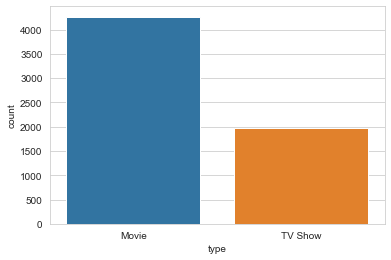

In [13]:
sns.countplot(df['type'])

As you can see from the graph above, there are more movies than a Tv show.

### 2) Director

<AxesSubplot:>

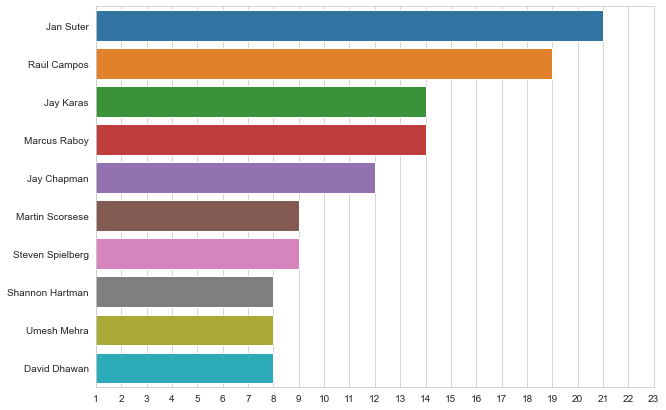

In [14]:
plt.figure(figsize=[10,7])
plt.xlim(1,23)
plt.xticks(range(1,24))
sns.barplot(y = to_1D(df['director']).value_counts(sort=True).iloc[1:11].index, x = to_1D(df['director']).value_counts(sort=True).iloc[1:11])

As you can see from the graph above, Jan Suter is the most director to produce movie/show in this dataset. Here is some information about some them: 
1. Jan Suter is a producer and director based in Mexico City with extensive experience developing and producing projects for key players such as Netflix, YouTube Premium, and Univision. Most recently, he executive produced the first YouTube Originals Spanish-language scripted series, 'Sobreviví' and a 13-episode series documentary titled 'The Culture Code' filmed in the U.S. and France.
2. There's very little information about Raul Campos.
3. Marcus Raboy is an American film and music video director. Since the early 1990s, Raboy has amassed a large number music video credits directing music videos for Mary J. Blige, Dixie Chicks, Rihanna, Luther Vandross, Shakira, Santana, and Westlife among other notable artists.

### 3) Casting Member

<AxesSubplot:>

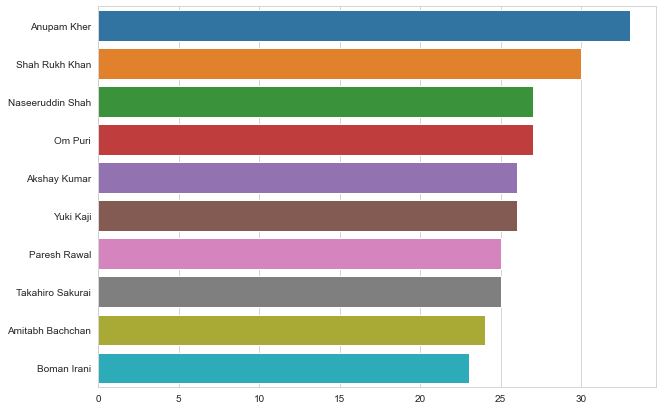

In [15]:
plt.figure(figsize=[10,7])
sns.barplot(y = to_1D(df['cast']).value_counts(sort=True).iloc[1:11].index, x = to_1D(df['cast']).value_counts(sort=True).iloc[1:11])

As you can see from the graph above, Anupam Kher is the most casting member to appear in this dataset. There's an interesting fact that can be taken from this graph, 9/10 of the actor is an Indian Actor/Actress.

### 4) Release Year

Text(0, 0.5, 'Movie Counts')

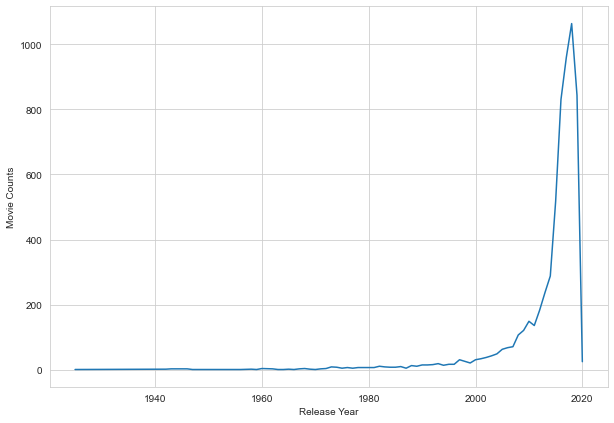

In [16]:
plt.figure(figsize=[10,7])
sns.lineplot(x=df['release_year'].value_counts().index, y=df['release_year'].value_counts())
plt.xlabel('Release Year')
plt.ylabel('Movie Counts')

As you can see from the graph above, there are significance movie released between 2010 - 2020. Noted that this dataset only consist until early 2020.

### 5) Ratings

D:\Miniconda\envs\minimal_ds\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='rating', ylabel='count'>

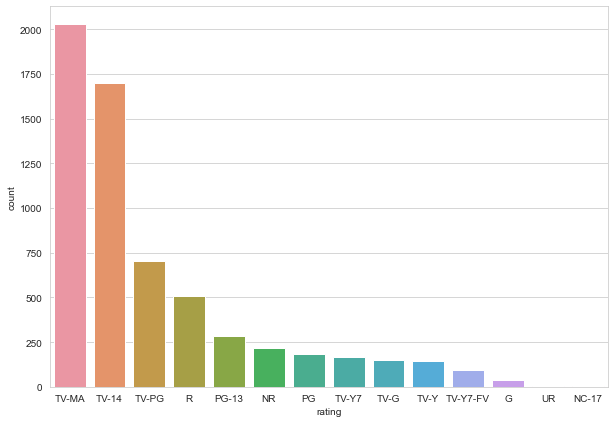

In [17]:
plt.figure(figsize=[10,7])
sns.countplot(df['rating'], order = df['rating'].value_counts(sort=True).index)

As you can see from the graph above, TV-MA dominated the rating besides TV-14. Here is some interesting information about the top 3 ratings:
1. TV-MA is intended to be viewed by mature, adult audiences and may be unsuitable for children under 17.
2. TV-14 may be unsuitable for children under 14 years of age.
3. TV-PG contains material that parents may find unsuitable for younger children. Parental guidance is recommended.

### 6) Genres 

<AxesSubplot:>

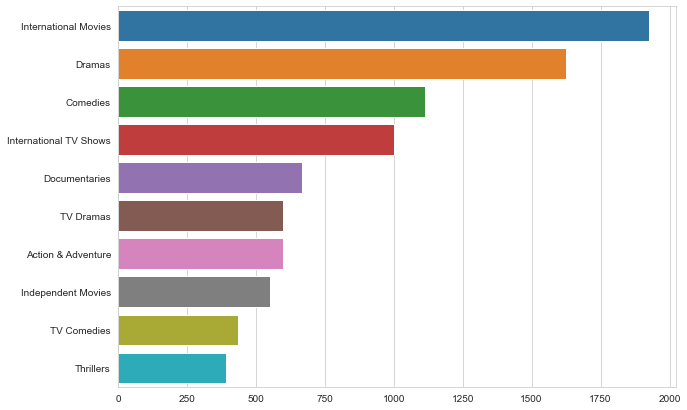

In [18]:
plt.figure(figsize=[10,7])
sns.barplot(y = to_1D(df['listed_in']).value_counts(sort=True).iloc[:10].index, x = to_1D(df['listed_in']).value_counts(sort=True).iloc[:10])

As you can see from the graph above, International Movies is the most popular genres, followed by Dramas and Comedies. The reason why there are so many international movies on Netflix is because there are currently more subscribers internationally than within USA.

## Bivariate Analysis

In [19]:
df['release_year'] = df['release_year'].astype('str')

### Trend of Types

Text(0, 0.5, 'Title Count')

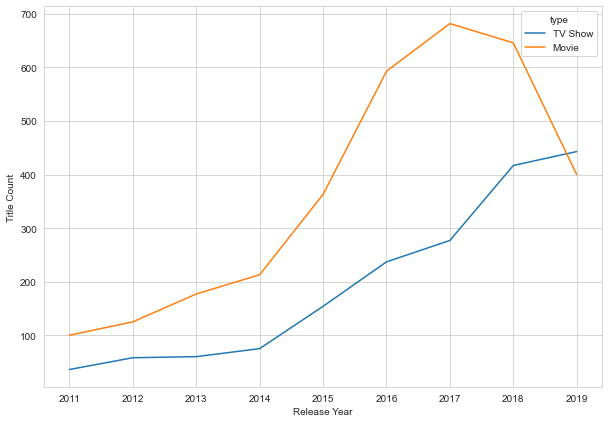

In [20]:
type_year=df.groupby(['release_year','type'],as_index=False)['title'].count()
plt.figure(figsize=[10,7])
sns.lineplot(x=type_year['release_year'].iloc[-20:-2], y=type_year['title'].iloc[-20:-2], hue=type_year['type'])
plt.xlabel('Release Year')
plt.ylabel('Title Count')

As you can see from the graph above, there is a trend that tv show overtake movie in count as the year progress.

# Movie Simmilarity

### Import the Necessary Library and File

In [21]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import difflib
movie = pd.read_csv('netflix_titles.csv', header=0)
movie['index']=movie.index
features = ['type','director','cast','rating','listed_in','description']

### Convert List in Columns into String

In [22]:
movie['country'].fillna('Worldwide', inplace=True)
movie['cast'] = movie['cast'].str.split(', ')
movie['director'] = movie['director'].str.split(', ')
movie['country'] = movie['country'].str.split(', ')
movie['listed_in'] = movie['listed_in'].str.split(', ')
movie['cast'].dropna(inplace=True)
movie['director'].dropna(inplace=True)
for feature in features:
    movie[feature] = movie[feature].fillna('')

In [23]:
def list_to_string(list):
    return ','.join(map(str, list)) 

def title_from_index(index):
    return movie[movie['index'] == index]["title"].values[0]

def index_from_title(title):
    title_list = movie['title'].tolist()
    common = difflib.get_close_matches(title, title_list, 1)
    titlesim = common[0]
    return movie[movie['title'] == titlesim]["index"].values[0]

In [24]:
for count, row in enumerate(movie['cast']):
    changed = list_to_string(row)
    movie['cast'].iloc[count]=changed

for count, row in enumerate(movie['director']):
    changed = list_to_string(row)
    movie['director'].iloc[count]=changed
    
for count, row in enumerate(movie['listed_in']):
    changed = list_to_string(row)
    movie['listed_in'].iloc[count]=changed

D:\Miniconda\envs\minimal_ds\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


### Concate All of the Necessary Features into a Column

In [25]:
def combine_features(row):
    try:
        return row['type'] +" "+row['director']+" "+row['cast']+" "+row['rating']+" "+row['listed_in']+" "+row['description']
    except:
        print ("Error:", row)

movie["combined_features"] = movie.apply(combine_features,axis=1)

### Model Training

In [26]:
cv = CountVectorizer()
count_matrix = cv.fit_transform(movie["combined_features"])
cosine_sim = cosine_similarity(count_matrix) 

### Input the Name of the Movie / Tv Shows

In [27]:
user_movie = input("Enter movie of your choice:\t")
movie_index = index_from_title(user_movie)

In [32]:
similar_movies =  list(enumerate(cosine_sim[movie_index]))
similiar_moviess = []
similar_movies_sorted = sorted(similar_movies,key=lambda x:x[1],reverse=True)
i=0
print("\nOther movies you might be interested in:\n")
for rec_movie in similar_movies_sorted:
        if(i!=0):
            similiar_moviess.append(title_from_index(rec_movie[0]))
            print (i,") ",title_from_index(rec_movie[0]),sep="")
        i=i+1
        if i>50:
            break


Other movies you might be interested in:

1) Beyond Stranger Things
2) The Umbrella Academy
3) Anjaan: Rural Myths
4) Zombie Dumb
5) How to Live Mortgage Free with Sarah Beeny
6) Fear Files... Har Mod Pe Darr
7) The Vampire Diaries
8) Mighty Little Bheem
9) Prank Encounters
10) Goodnight DJ 1
11) Haunted
12) Colony
13) I Hear You
14) Melodies of Life - Born This Way
15) Nightflyers
16) Jonathan Strange & Mr Norrell
17) Love Rhythms - Accidental Daddy
18) Legacies
19) Disappearance
20) Darr Sabko Lagta Hai
21) Anjaan: Special Crimes Unit
22) Kiss Me First
23) Star-Crossed
24) I Have a Script
25) Killer Ratings
26) Dancing Angels
27) Top 10 Secrets and Mysteries
28) Harry & Bunnie
29) Rab Se Sohna Isshq
30) Scream
31) Star Trek: Enterprise
32) Limitless
33) Disenchantment
34) The OA
35) Dramaworld
36) Club Friday To Be Continued - My Beautiful Tomboy
37) Glow Up
38) Wanted
39) Bountiful Blessings
40) Good Girls
41) Love
42) Kakegurui
43) Hot Date
44) Money for Nothing
45) Big Dreams, Sm

In [33]:
similiar_moviess

['Beyond Stranger Things',
 'The Umbrella Academy',
 'Anjaan: Rural Myths',
 'Zombie Dumb',
 'How to Live Mortgage Free with Sarah Beeny',
 'Fear Files... Har Mod Pe Darr',
 'The Vampire Diaries',
 'Mighty Little Bheem',
 'Prank Encounters',
 'Goodnight DJ 1',
 'Haunted',
 'Colony',
 'I Hear You',
 'Melodies of Life - Born This Way',
 'Nightflyers',
 'Jonathan Strange & Mr Norrell',
 'Love Rhythms - Accidental Daddy',
 'Legacies',
 'Disappearance',
 'Darr Sabko Lagta Hai',
 'Anjaan: Special Crimes Unit',
 'Kiss Me First',
 'Star-Crossed',
 'I Have a Script',
 'Killer Ratings',
 'Dancing Angels',
 'Top 10 Secrets and Mysteries',
 'Harry & Bunnie',
 'Rab Se Sohna Isshq',
 'Scream',
 'Star Trek: Enterprise',
 'Limitless',
 'Disenchantment',
 'The OA',
 'Dramaworld',
 'Club Friday To Be Continued - My Beautiful Tomboy',
 'Glow Up',
 'Wanted',
 'Bountiful Blessings',
 'Good Girls',
 'Love',
 'Kakegurui',
 'Hot Date',
 'Money for Nothing',
 'Big Dreams, Small Spaces',
 'Argon',
 'Singles Vil